In [1]:
# in this project, I will try to explore and analyze data about covid19 that i downloaded from ourworldindata.org

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [62]:
covid_deaths= pd.read_csv(r"C:\Users\BIADI\Desktop\First\Covid\owid-covid-data.csv")
covid_deaths=covid_deaths.loc[:,["location","date","population","total_cases","new_cases","total_deaths"]]
covid_deaths=covid_deaths[covid_deaths["location"]=="France"]
covid_deaths["death_Ratio%"]=covid_deaths["total_deaths"]/covid_deaths["total_cases"]*100
covid_deaths=covid_deaths.reset_index()
covid_deaths=covid_deaths.set_index("date")
covid_deaths.index=pd.to_datetime(covid_deaths.index)
covid_deaths["death_Ratio%"].idxmax()
#weird.head()


Timestamp('2020-04-11 00:00:00')

Text(0, 0.5, 'Covid new cases')

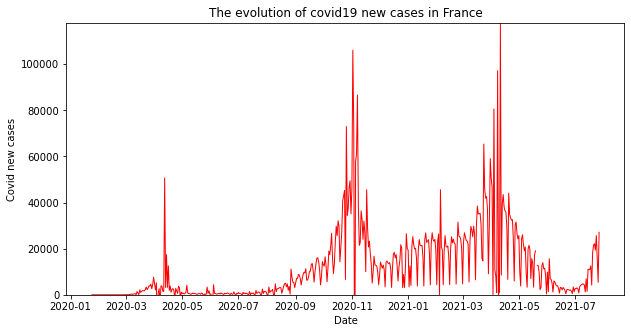

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(covid_deaths.index,covid_deaths["new_cases"],'r',linewidth=1)
z=covid_deaths["new_cases"].max()
ax.set_ylim([0, z])
ax.set_title("The evolution of covid19 new cases in France")
ax.set_xlabel("Date")
ax.set_ylabel( "Covid new cases")

Text(0, 0.5, 'death ratio')

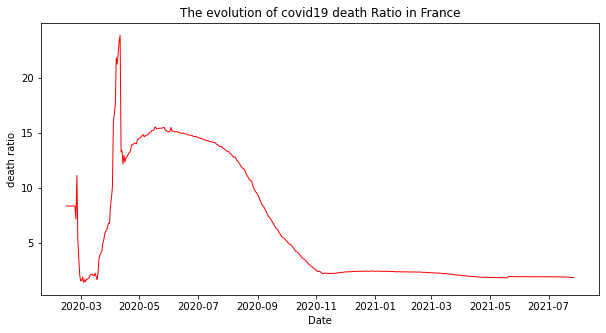

In [117]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(covid_deaths.index,covid_deaths["death_Ratio%"],'r',linewidth=1)
ax.set_title("The evolution of covid19 death Ratio in France")
ax.set_xlabel("Date")
ax.set_ylabel( "death ratio")

In [96]:
covid_vaccins=pd.read_csv(r"C:\Users\BIADI\Desktop\First\Covid\covid-vaccin.csv")
covid_vaccins=covid_vaccins.loc[:,["date","location","people_vaccinated","people_fully_vaccinated"]]
covid_vaccins=covid_vaccins[covid_vaccins["location"]=="France"]
covid_vaccins=covid_vaccins.dropna()
Population=covid_deaths["population"].max()
covid_vaccins["vaccin_percentage"]=covid_vaccins["people_fully_vaccinated"]/Population*100



,date,location,people_vaccinated,people_fully_vaccinated,vaccin_percentage
34594,5/14/2021,France,20067471.0,8867131.0,13.123998
34595,5/15/2021,France,20438425.0,8964768.0,13.268508
34596,5/16/2021,France,20639521.0,8985966.0,13.299883
34597,5/17/2021,France,21012223.0,9139517.0,13.527149
34598,5/18/2021,France,21467430.0,9301347.0,13.766669
...,...,...,...,...,...
34662,7/21/2021,France,38650808.0,29368656.0,43.467745
34663,7/22/2021,France,39079993.0,29775149.0,44.069384
34664,7/23/2021,France,39505586.0,30218021.0,44.724866
34665,7/24/2021,France,39783989.0,30496887.0,45.137608


In [140]:
covid_vaccins=covid_vaccins.reset_index()
covid_vaccins=covid_vaccins.set_index("date")
covid_vaccins.index=pd.to_datetime(covid_vaccins.index)
covid_deaths_2=covid_deaths.loc[:,["death_Ratio%","total_deaths"]]
df=pd.merge(covid_vaccins,covid_deaths_2,how="left",on ="date")
df.drop("index",axis=1,inplace=True)
df.head()
#scipy.stats.pearsonr(df["death_Ratio%"],df["vaccin_percentage"])




,location,people_vaccinated,people_fully_vaccinated,vaccin_percentage,death_Ratio%,total_deaths
date,,,,,,
2021-01-16,France,434221.0,77.0,0.000114,2.380431,70281.0
2021-01-17,France,444751.0,119.0,0.000176,2.371837,70422.0
2021-01-18,France,529562.0,281.0,0.000416,2.382396,70826.0
2021-01-19,France,658709.0,406.0,0.000601,2.385290,71482.0
2021-01-20,France,794607.0,563.0,0.000833,2.374340,71792.0


In [148]:
df = df[df['vaccin_percentage']>=13]

<AxesSubplot:xlabel='people_fully_vaccinated', ylabel='death_Ratio%'>

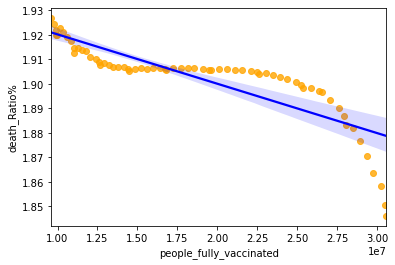

In [149]:
sns.regplot(x="people_fully_vaccinated",y="death_Ratio%",data=df,scatter_kws={"color":"orange"},line_kws={"color":"blue"})

In [150]:
df.corr()

,people_vaccinated,people_fully_vaccinated,vaccin_percentage,death_Ratio%,total_deaths
people_vaccinated,1.000000,0.967159,0.967159,-0.826050,0.981833
people_fully_vaccinated,0.967159,1.000000,1.000000,-0.840085,0.912565
vaccin_percentage,0.967159,1.000000,1.000000,-0.840085,0.912565
death_Ratio%,-0.826050,-0.840085,-0.840085,1.000000,-0.738561
total_deaths,0.981833,0.912565,0.912565,-0.738561,1.000000


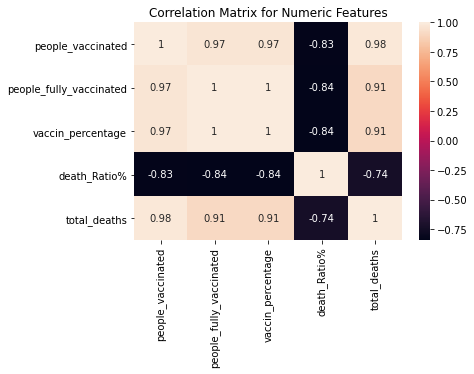

In [157]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.show()


In [158]:
#the number of people fully vanccinated has a high negative correlation with the death_Ratio of people that got the virus